In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.describe() 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
 df.isnull().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
df.head() 

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df.tail()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


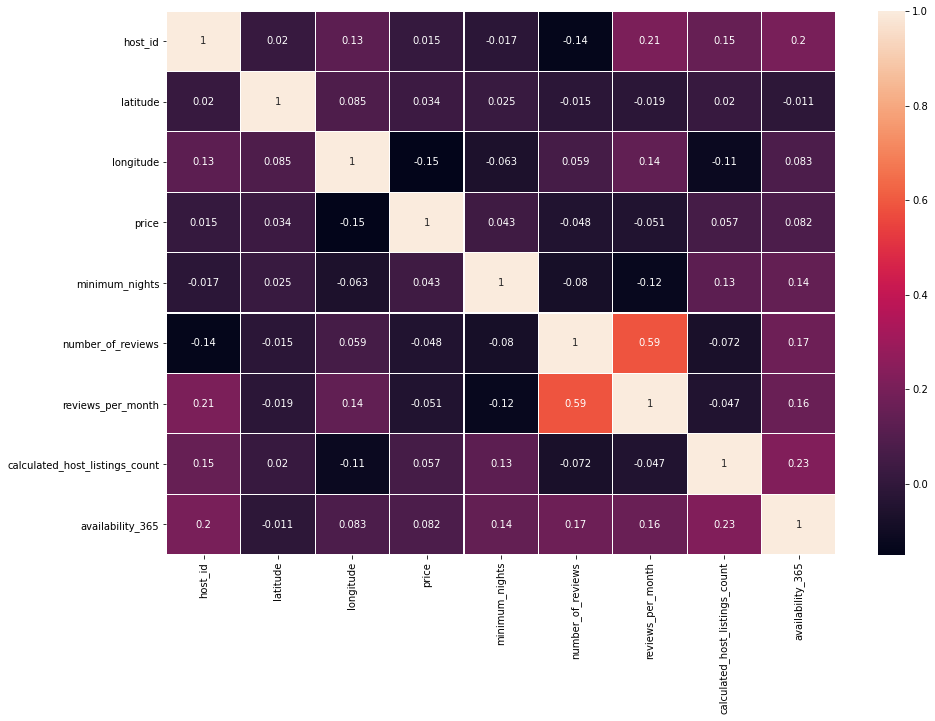

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)
plt.show()

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

These are the 5 Boroughs of New York which are labelled as the neighbourhood gropus in which the various properties of Airbnb belong

Text(0.5, 1.0, 'Neighbourhood Group')

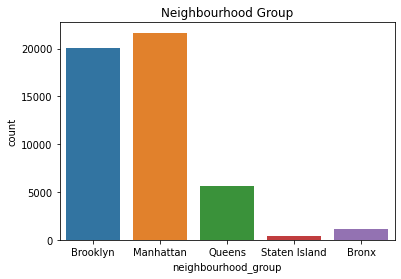

In [ ]:
sns.countplot(x = 'neighbourhood_group',data = df)
plt.title('Neighbourhood Group')

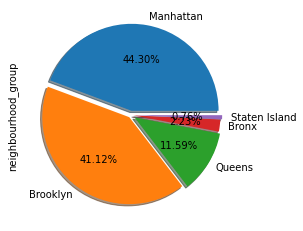

In [ ]:
df['neighbourhood_group'].value_counts().plot(kind='pie', explode= [0.05,0.03,0.05,0.03,0.05
],autopct='%2.2f%%', shadow=True)


We can see here, that most of the properties fall in the Brooklyn or Manhattan neighbourhood group, while there very few properties in Bronx and Staten Island.

Text(0.5, 1.0, 'Room Types')

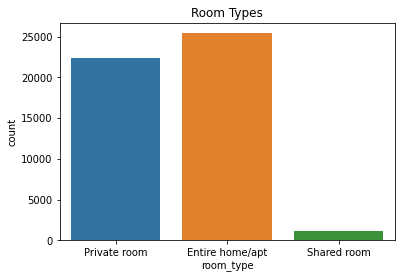

In [ ]:
sns.countplot(x = 'room_type',data= df) 
plt.title('Room Types')

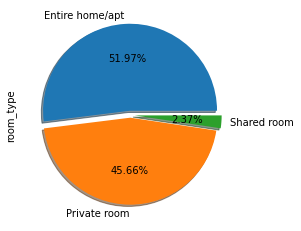

In [ ]:
df['room_type'].value_counts().plot.pie(explode=[0.05,0.03,0.05],autopct='%2.2f%%',shadow=True)

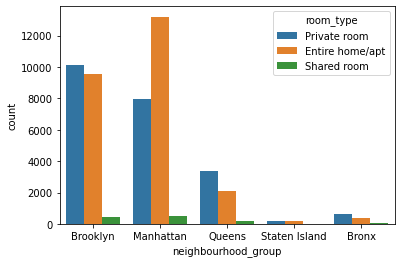

In [ ]:
sns.countplot(x ='neighbourhood_group',hue='room_type',data=df) 

In [ ]:
#This plot shows the type of rooms available in the different  neighbourhoods.

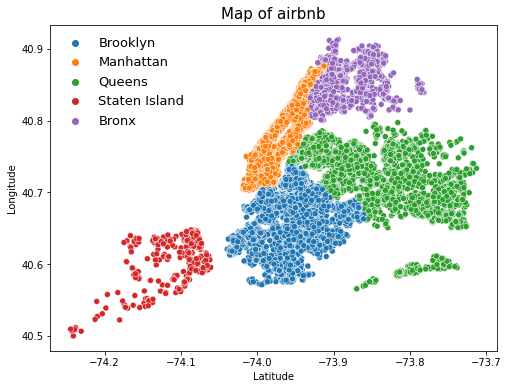

In [ ]:
plt.figure(figsize=(8,6))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group') 
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)


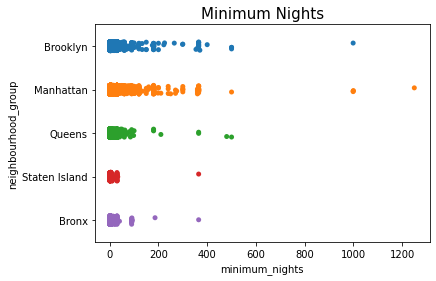

In [ ]:
plt.title('Minimum Nights',fontsize=15)
sns.stripplot(data = df,x='minimum_nights',y = 'neighbourhood_group')
plt.show()



There are listings in some Boroughs which are providing service ranging from 1 night to 3 years. Most of the distribution is between 1 night to 1 year.

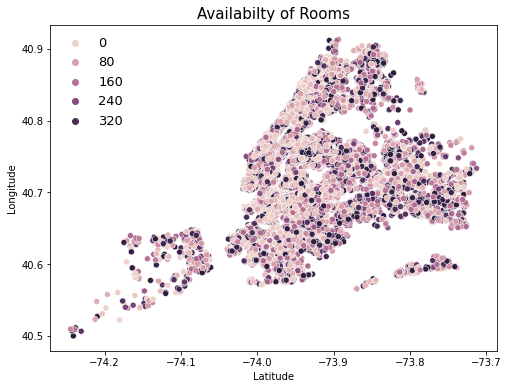

In [ ]:
plt.figure(figsize=(8,6))
c = sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365')
plt.title('Availabilty of Rooms', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)


In [ ]:
#The map shows the availabilty of rooms in a year.

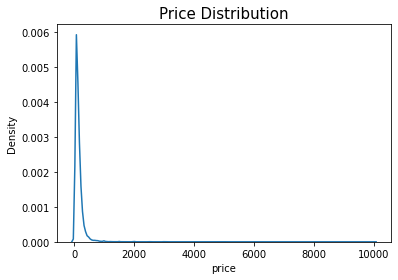

In [ ]:
plt.title('Price Distribution',fontsize=15) 
sns.kdeplot(df['price'],data = df)
plt.show()

In [ ]:

#We can observe that prices of listing start from less than 100 and maximum price reaches around 10000. The distribution curve shows that most of listings prices ranges below 500.


In [ ]:
df.groupby('neighbourhood_group')
mean_df = df.groupby('neighbourhood_group')['price'].mean()
mean_df


neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

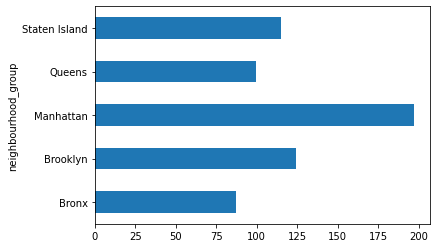

In [ ]:
mean_df.plot(kind='barh',y = 'mean')

In [ ]:
#For better visualisation, we remove some extreme values.

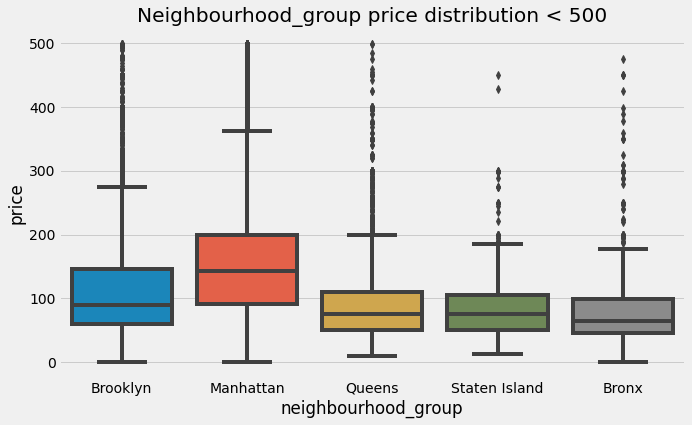

In [ ]:
plt.style.use('fivethirtyeight')
ng = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng) 
plt.title("Neighbourhood_group price distribution < 500")
plt.show()


So, by the box plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First,   we can state that Manhattan has the highest range of prices for the listings with approximately 150 price as average observation, followed by Brooklyn with approximately $90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

Top Reviewed Listings

In [ ]:
top_reviewed_listings=df.nlargest(10,'number_of_reviews') 
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
#These are the top 10 reviewed places.


Top 10 most popular Airbnb hosts



In [ ]:
top_hosts = df.host_id.value_counts().head(10)
top_hosts_df=pd.DataFrame(top_hosts)
top_hosts_df.reset_index(inplace=True) 
top_hosts_df.index += 1
top_hosts_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True) 
top_hosts_df


,Host_ID,P_Count
1,219517861,327
2,107434423,232
3,30283594,121
4,137358866,103
5,12243051,96
6,16098958,96
7,61391963,91
8,22541573,87
9,200380610,65
10,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

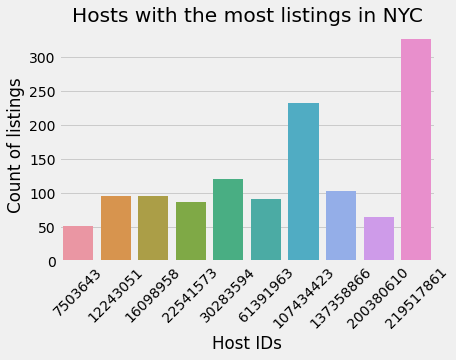

In [ ]:
jay=sns.barplot(x="Host_ID", y="P_Count", data=top_hosts_df) 
jay.set_title('Hosts with the most listings in NYC') 
jay.set_ylabel('Count of listings')
jay.set_xlabel('Host IDs') 
jay.set_xticklabels(jay.get_xticklabels(), rotation=45)


This is the list of top 10 most popular host in the given neighbourhood groups. Maximum number of people love to stay at their place. The reason behind their popularity may depend upon the price, neighbourhood, cleanliness and many more.


**Conclusion**


Firstly, I started the EDA by importing the data and cleaning of the dataset.
Then the different parameters were visualised to get a better understanding of the dataset.

Then I calculated the price distribution and understood the mean pricing the rooms in different Boroughs.
I have also calculated the most reviewed listings and also found out the hosts with the most listings and could say about  the popular hosts.

So, we can use the dataset and perform EDA to understand the different patterns in the data and understand their properties.\ Hence, using this dataset we were able to find out the different properties of the New York City Airbnbs and could also undertand the popular hosts.
